# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [24]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [25]:
df

,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F)
0,NaN,"Jan 01, 1979",1979/01/01,44.57
1,NaN,"Jan 02, 1979",1979/01/02,49.24
2,NaN,"Jan 03, 1979",1979/01/03,52.43
3,NaN,"Jan 04, 1979",1979/01/04,52.30
4,NaN,"Jan 05, 1979",1979/01/05,47.61
...,...,...,...,...
12049,NaN,"Dec 28, 2011",2011/12/28,57.00
12050,NaN,"Dec 29, 2011",2011/12/29,59.48
12051,NaN,"Dec 30, 2011",2011/12/30,57.24
12052,NaN,"Dec 31, 2011",2011/12/31,57.50


### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [26]:
df = df[df.Notes != "Total"].drop(columns=['Notes'])

>3) Make a column called Date that is in the pandas datetime format

In [27]:
df['Date'] = pd.to_datetime(df['Month Day, Year Code'])

>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [28]:
df['Year'] = df['Month Day, Year Code'].apply(lambda x: x.split('/')[0])
df['Month'] = df['Month Day, Year Code'].apply(lambda x: x.split('/')[1])
df['Day'] = df['Month Day, Year Code'].apply(lambda x: x.split('/')[2])
df

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day
0,"Jan 01, 1979",1979/01/01,44.57,1979-01-01,1979,01,01
1,"Jan 02, 1979",1979/01/02,49.24,1979-01-02,1979,01,02
2,"Jan 03, 1979",1979/01/03,52.43,1979-01-03,1979,01,03
3,"Jan 04, 1979",1979/01/04,52.30,1979-01-04,1979,01,04
4,"Jan 05, 1979",1979/01/05,47.61,1979-01-05,1979,01,05
...,...,...,...,...,...,...,...
12048,"Dec 27, 2011",2011/12/27,54.34,2011-12-27,2011,12,27
12049,"Dec 28, 2011",2011/12/28,57.00,2011-12-28,2011,12,28
12050,"Dec 29, 2011",2011/12/29,59.48,2011-12-29,2011,12,29
12051,"Dec 30, 2011",2011/12/30,57.24,2011-12-30,2011,12,30


In [29]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

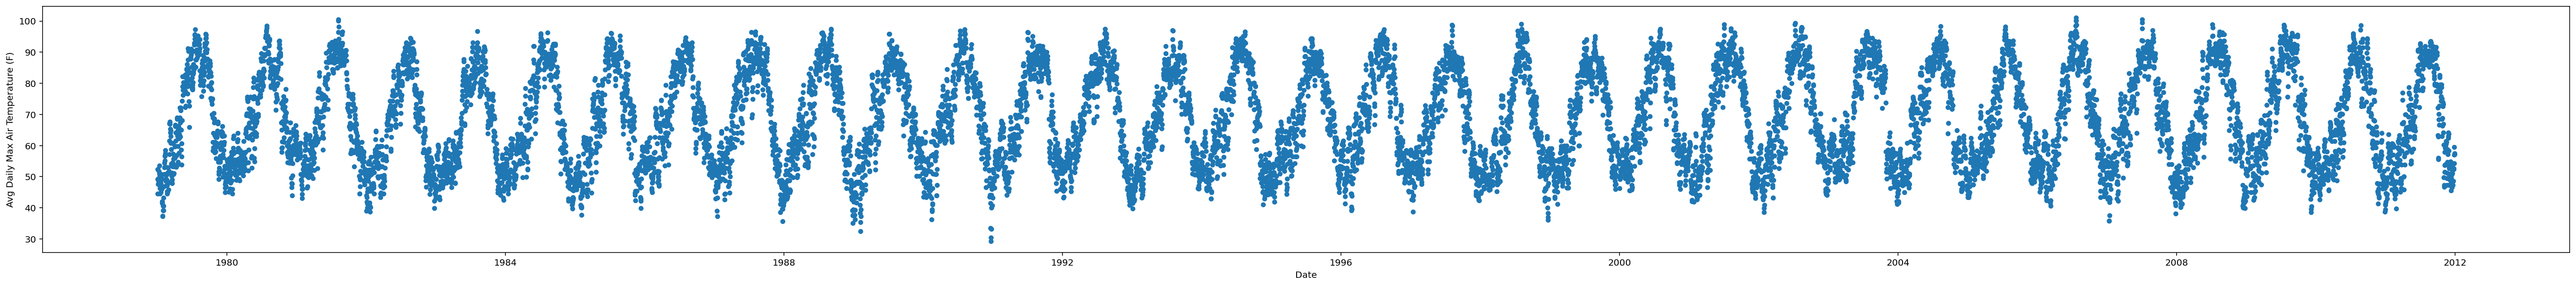

In [30]:
df.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)',figsize=(50,5))

>5) Describe your plot.

In [9]:
# It looks like a sin or a cos curve that is affected by change in seasons. The max and min temperatures for the years are all relatively similar for the most part.

### Adding colors for our graph

In [50]:
len(df['Month'].unique())

12

In [31]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

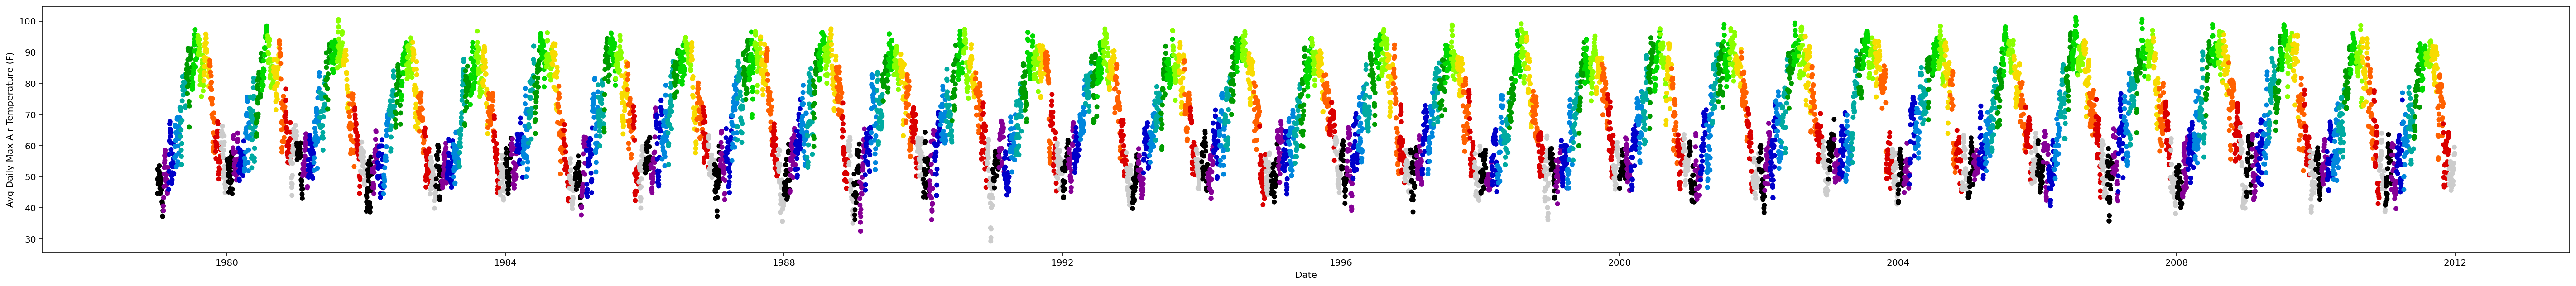

In [32]:
df.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)',figsize=(50,5),c=df['color'])

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [37]:
subset= df[df['Date']<=pd.datetime(1979,6,1)]
subset

,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Date,Year,Month,Day,DateInt,color
0,"Jan 01, 1979",1979/01/01,44.57,1979-01-01,1979,01,01,2839968.0,#000000
1,"Jan 02, 1979",1979/01/02,49.24,1979-01-02,1979,01,02,2840832.0,#000000
2,"Jan 03, 1979",1979/01/03,52.43,1979-01-03,1979,01,03,2841696.0,#000000
3,"Jan 04, 1979",1979/01/04,52.30,1979-01-04,1979,01,04,2842560.0,#000000
4,"Jan 05, 1979",1979/01/05,47.61,1979-01-05,1979,01,05,2843424.0,#000000
...,...,...,...,...,...,...,...,...,...
147,"May 28, 1979",1979/05/28,72.27,1979-05-28,1979,05,28,2966976.0,#00aaa1
148,"May 29, 1979",1979/05/29,72.79,1979-05-29,1979,05,29,2967840.0,#00aaa1
149,"May 30, 1979",1979/05/30,76.76,1979-05-30,1979,05,30,2968704.0,#00aaa1
150,"May 31, 1979",1979/05/31,80.61,1979-05-31,1979,05,31,2969568.0,#00aaa1


>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

<AxesSubplot:xlabel='Date', ylabel='Avg Daily Max Air Temperature (F)'>

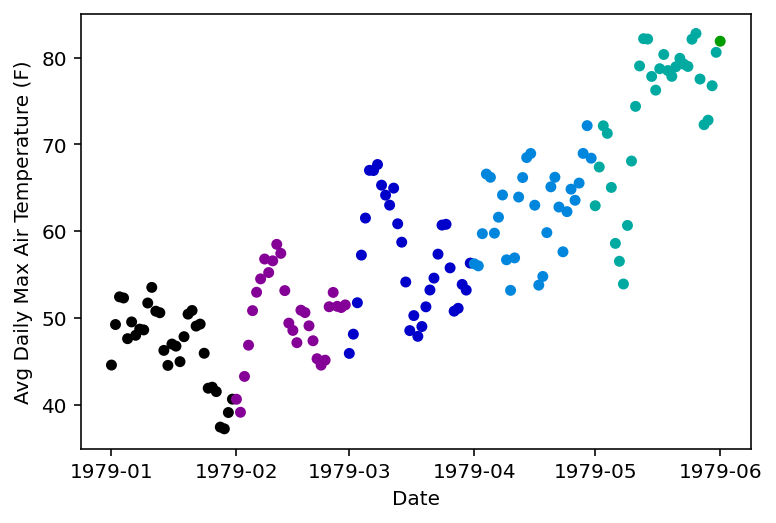

In [39]:
subset.plot.scatter(x='Date',y='Avg Daily Max Air Temperature (F)', c=subset['color'])

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [40]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [41]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [42]:
Y_pred = lin_reg(X,Y)

0.0002511525782517803 -671.4534045475984


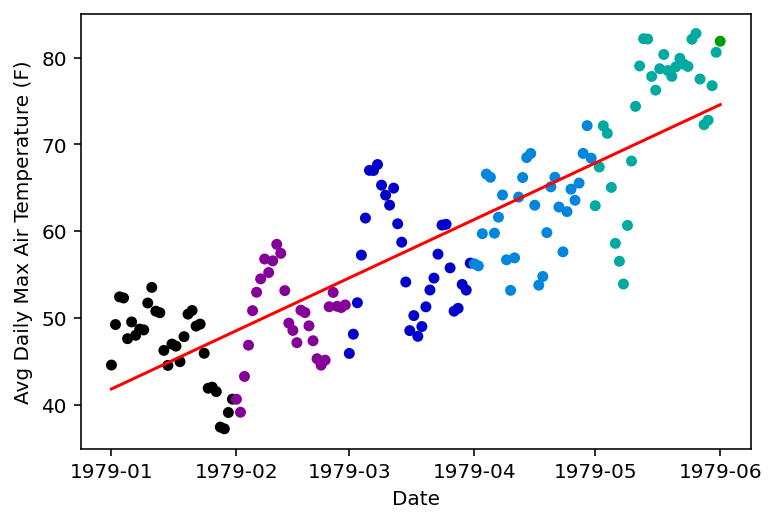

In [43]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

In [ ]:
# slope = 0.0002511525782517803, intercept = -671.4534045475984

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [44]:
[min(Y_pred), max(Y_pred)]

[41.8118808049536, 74.57825077399389]

In [ ]:
# The slope is positive

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [45]:
X=df['DateInt'].values
Y=df['Avg Daily Max Air Temperature (F)'].values
Y_pred = lin_reg(X,Y)

1.3842841004302256e-07 67.60597761859036


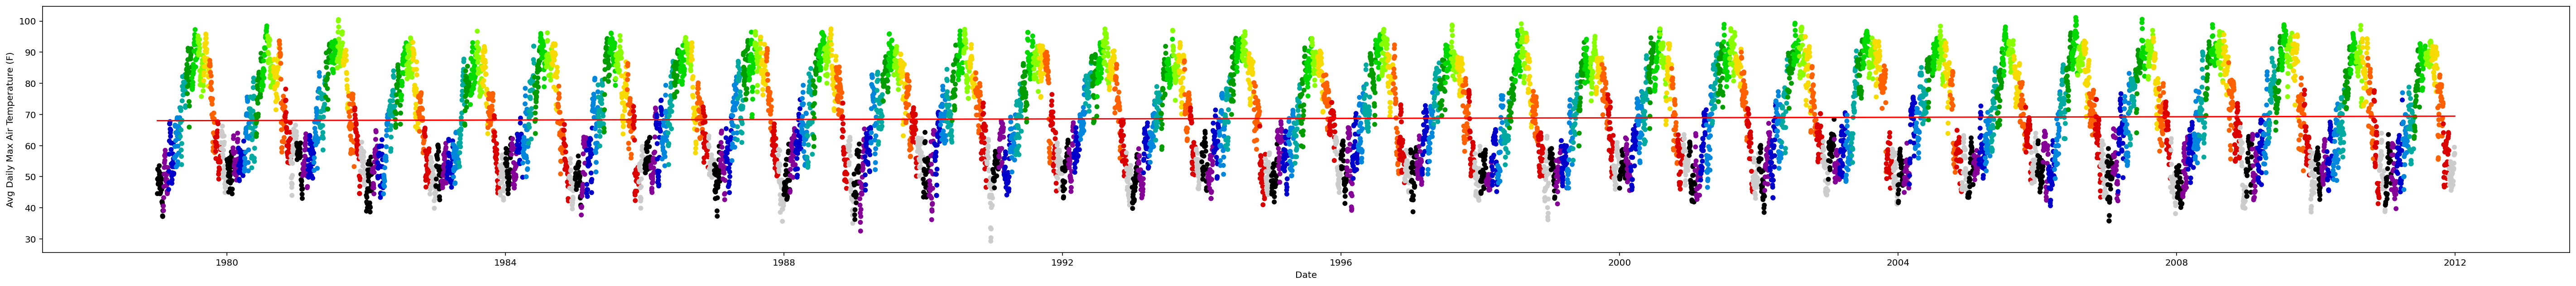

In [49]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize=(50,5))
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred), max(Y_pred)], color='red')
plt.show()                  

>12) Is the slope positive or negative? What do you think that means?

In [ ]:
# The slope is positive because it has a value of 1.38 which is greater than 0. This means that over the years, the average daily max air temperature is increasing. Global warming may be the cause of this.